# OBJECTIVES:
The study has the following objectives or business use cases:
•	Merge the country sheet and Zomato file to get the country code
•	Get the Top rated restaurants in each city in India (On the basis of rating and votes).
•	Finding out relationship between the rating and votes.
•	No of Restaurants in each country.
•	Top 5 restaurants with online delivery
•	cheap but best restaurants available in a city
•	Top cuisines in each region.
•	Aggregate rating of all the restaurants in each city in a country.
•	Does rating influences the cost of restaurant? (Draw boxplot for this).
•	Top Percentage cover of restaurants in a city.(Draw pie graph for this).
•	Top cuisines in Indian restaurants.( Draw pie graph for this)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
restaurants=pd.read_csv('zomato.csv',encoding="ISO-8859-1")
countrycode=pd.read_excel('Country-Code.xlsx')

In [3]:
restaurants.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
restaurants.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
countrycode

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [6]:
# removing 0 from the average cost column
restaurants['Average Cost for two']=restaurants['Average Cost for two'].replace(0,np.nan)

In [7]:
# Merging the country sheet and zomato file to get the country code

restaurants=restaurants.merge(countrycode,on='Country Code')

In [8]:
restaurants.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


# list all the country now and do analysis on each one 

In [9]:
indiaRes=restaurants[restaurants['Country']=='India']
singaporeRes=restaurants[restaurants['Country']=='Singapore']
AusRes=restaurants[restaurants['Country']=='Australia']
BrazRes=restaurants[restaurants['Country']=='Brazil']
CanadaRes=restaurants[restaurants['Country']=='Canada']
UAERes=restaurants[restaurants['Country']=='UAE']
UKRes=restaurants[restaurants['Country']=='United Kingdom']
USRes=restaurants[restaurants['Country']=='Unites States']


# Getting the top rated restaurrants in each city in delhi 

In [10]:
indiaRes.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,No,No,No,No,3,3.9,Yellow,Good,140,India
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,No,No,No,No,2,3.5,Yellow,Good,71,India
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,No,No,No,No,2,3.6,Yellow,Good,94,India
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,No,No,No,No,2,4.0,Green,Very Good,87,India
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,No,No,No,No,3,4.2,Green,Very Good,177,India


In [11]:
indiaRes['City'].value_counts()

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Lucknow           21
Bhubaneshwar      21
Amritsar          21
Pune              20
Puducherry        20
Patna             20
Ludhiana          20
Ranchi            20
Surat             20
Vadodara          20
Nashik            20
Nagpur            20
Mysore            20
Mumbai            20
Varanasi          20
Mangalore         20
Agra              20
Kochi             20
Kolkata           20
Dehradun          20
Allahabad         20
Aurangabad        20
Bangalore         20
Bhopal            20
Chennai           20
Coimbatore        20
Goa               20
Indore            20
Jaipur            20
Kanpur            20
Vizag             20
Chandigarh        18
Hyderabad         18
Secunderabad       2
Panchkula          1
Mohali             1
Name: count, dtype: int64

# top restaurants in delhi based on the rating and voting

In [12]:
DelhiTopRes=indiaRes[(indiaRes['City']=='New Delhi')&(indiaRes['Aggregate rating']>4.5)] [['Aggregate rating','Restaurant Name','Votes']].sort_values(ascending=False,by='Votes')

In [13]:
# DelhiTopRes.apply(lambda x: [ if x.name=='Votes' else for i in x])
DelhiTopRes.style.apply(lambda x: ['background:green' if x.name=='Votes' else 'background: lightsteelblue' for i in x])

,Aggregate rating,Restaurant Name,Votes
3013,4.900000,Naturals Ice Cream,2620
3601,4.900000,Indian Accent - The Manor,1934
6659,4.600000,The California Boulevard,1691
4639,4.600000,Big Chill,1569
6997,4.700000,Echoes Satyaniketan,1563
7849,4.600000,Cafeteria & Co.,1136
3310,4.600000,Spezia Bistro,1071
6657,4.700000,Naturals Ice Cream,474
4298,4.900000,Masala Library,408
3732,4.600000,Tashan,304


# top restaurants in top rated city of singapore based on the rating and voting 

In [14]:
singaporeRes.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
544,18483372,Sky On 57,184,Singapore,"10 Bayfront Avenue, 57 Marina Bay Sands 018956","Bayfront Avenue, Downtown Core","Bayfront Avenue, Downtown Core, Singapore",103.860005,1.282661,"Chinese, Continental, Singaporean",...,No,No,No,No,4,3.4,Orange,Average,34,Singapore
545,18484349,Cut By Wolfgang Puck,184,Singapore,"2 Bayfront Avenue, B1-71 Marina Bay Sands 018972","Bayfront Subzone, Downtown Core","Bayfront Subzone, Downtown Core, Singapore",103.859422,1.285477,"American, Steak",...,No,No,No,No,4,4.0,Green,Very Good,33,Singapore
546,18496057,Restaurant Andre,184,Singapore,41 Bukit Pasoh Road 089855,"Cantonment Road, Outram","Cantonment Road, Outram, Singapore",103.840360,1.279420,"French, Mediterranean, European",...,No,No,No,No,4,3.8,Yellow,Good,33,Singapore
547,18483389,Potato Head Folk,184,Singapore,36 Keong Saik Road 089143,"Chinatown, Outram","Chinatown, Outram, Singapore",103.841669,1.280503,American,...,No,No,No,No,4,3.1,Orange,Average,34,Singapore
548,18483222,Jaan,184,Singapore,"2 Stamford Road, Level 70 Equinox Complex 178882","City Hall, Downtown Core","City Hall, Downtown Core, Singapore",103.853605,1.293221,French,...,No,No,No,No,4,3.8,Yellow,Good,35,Singapore


In [15]:
singaporeRes['City'].value_counts()

City
Singapore    20
Name: count, dtype: int64

In [16]:
SingaporeTopRes = singaporeRes[singaporeRes['Aggregate rating']>4] [['Aggregate rating','Restaurant Name','Votes']].sort_values(ascending=False,by='Votes')

In [17]:
# SingaporeTopRes.apply(lambda x: [ x.name=='Votes' else for i in x])

SingaporeTopRes.style.apply(lambda x: ['background:green' if x.name=='Votes' else 'background: lightsteelblue' for i in x])

,Aggregate rating,Restaurant Name,Votes
551,4.100000,Fratini La Trattoria,35
550,4.200000,Al'frank Cookies,29


# finding out relationship between rating and votes 

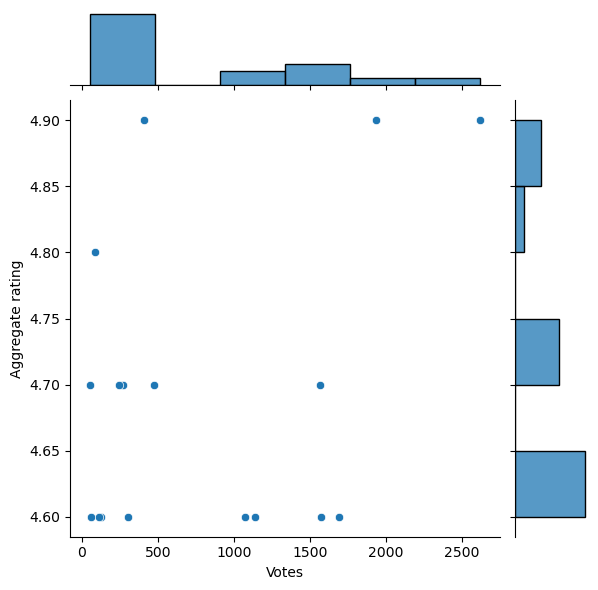

In [18]:
#  joint plot 

sns.jointplot(x='Votes',y= 'Aggregate rating',data=DelhiTopRes)

# no of restaurants in each country 

In [19]:
India=indiaRes['Restaurant Name'].nunique()
India 

6604

In [20]:
Canada=CanadaRes['Restaurant Name'].nunique()
Canada

4

In [21]:
Singapore=singaporeRes['Restaurant Name'].nunique()
Singapore

20

In [22]:
Australia=AusRes['Restaurant Name'].nunique()
Australia

24

In [23]:
Brazil=BrazRes['Restaurant Name'].nunique()
Brazil

58

In [24]:
UAE=UAERes['Restaurant Name'].nunique()
UAE

55

In [25]:
UK=UKRes['Restaurant Name'].nunique()
UK

74

In [26]:
US=USRes['Restaurant Name'].nunique()
US

0

# top five restaurants with online delivery 

In [27]:
DelhiTopOnlineRes=indiaRes[(indiaRes['City']=='New Delhi')&(indiaRes['Aggregate rating']>4.5)&(indiaRes['Has Online delivery']=='Yes')][['Aggregate rating','Restaurant Name','Votes','Has Online delivery']].sort_values(ascending=False,by='Votes').head()

In [28]:
DelhiTopOnlineRes.style.apply(lambda x:['background:green' if x.name=='Votes' else 'background:lightsteelblue' for i in x])

,Aggregate rating,Restaurant Name,Votes,Has Online delivery
3013,4.900000,Naturals Ice Cream,2620,Yes
3310,4.600000,Spezia Bistro,1071,Yes
6657,4.700000,Naturals Ice Cream,474,Yes
3014,4.700000,Zabardast Indian Kitchen,242,Yes
7180,4.600000,Greenr Cafe,112,Yes


In [29]:
DelhiTopOnlineRes=indiaRes[(indiaRes['City']=='Gurgaon')&(indiaRes['Aggregate rating']>4.5)&(indiaRes['Has Online delivery']=='Yes')][['Aggregate rating','Restaurant Name','Votes','Has Online delivery']].sort_values(ascending=False,by='Votes').head()

In [30]:
DelhiTopOnlineRes.style.apply(lambda x:[ 'background : green' if x.name=='Votes' else 'background : lightsteelblue' for i in x ])

,Aggregate rating,Restaurant Name,Votes,Has Online delivery
1312,4.600000,Twigly,395,Yes
1381,4.900000,Caterspoint,223,Yes
1478,4.600000,Dudleys,150,Yes


# checking all the countries that provide online delivery 

<Axes: xlabel='Country', ylabel='count'>

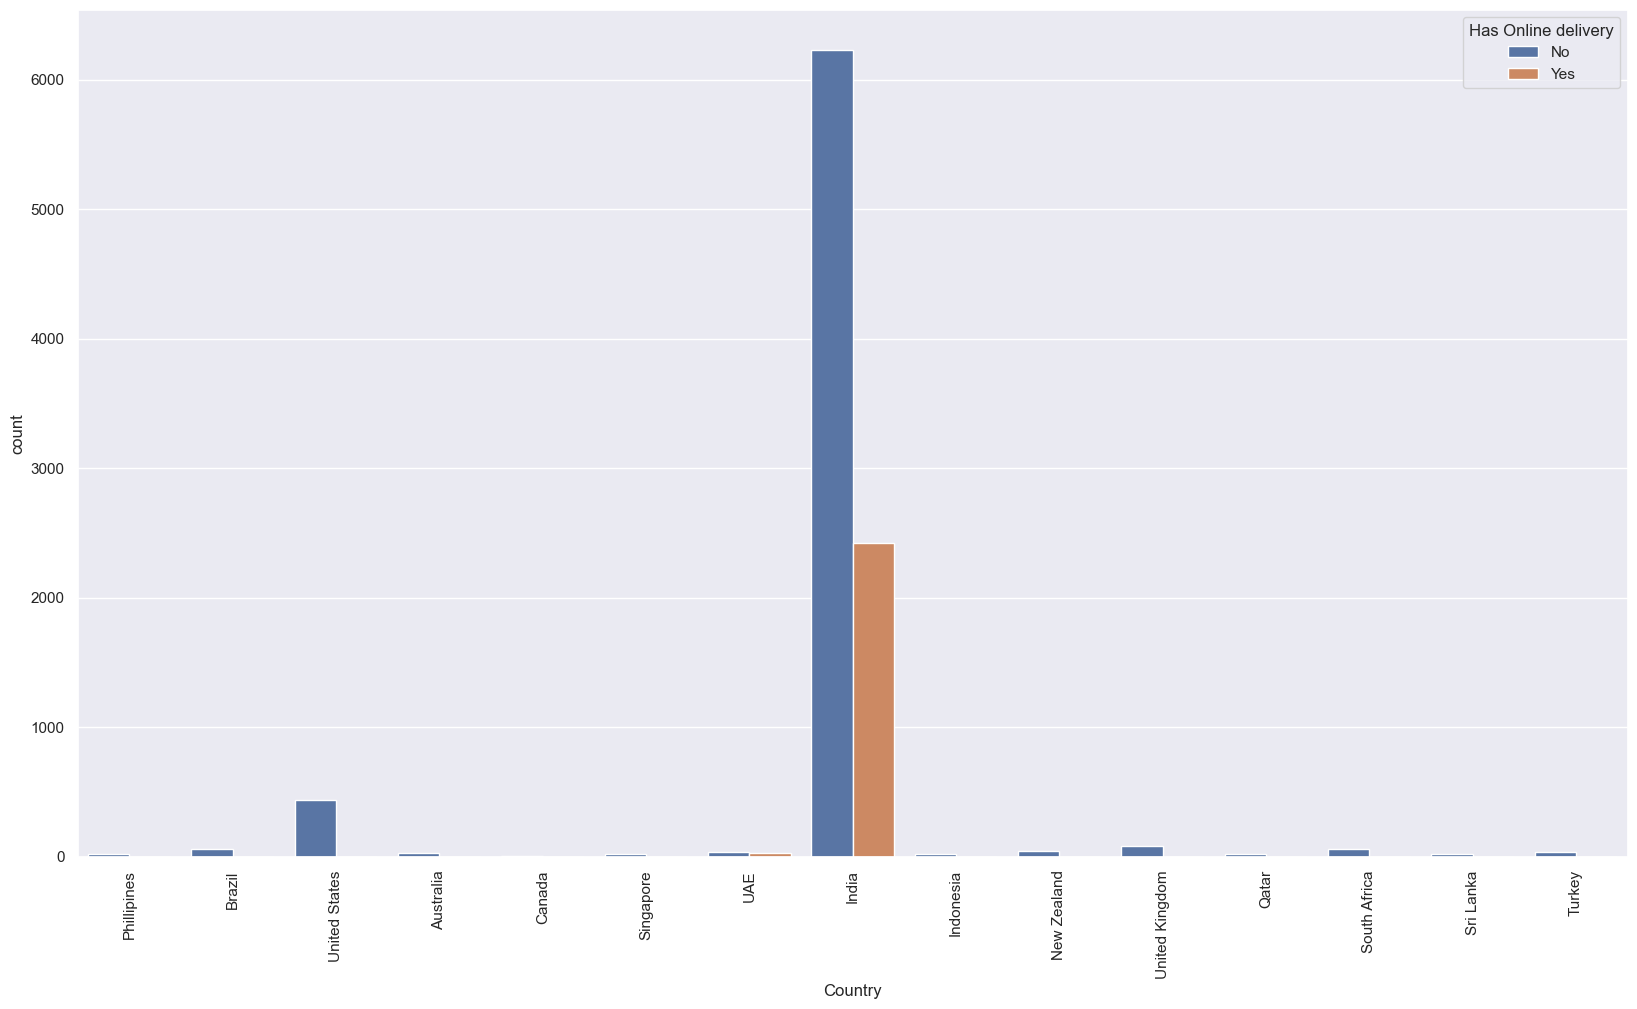

In [32]:
# sns.set(rc{'figure.figsize':(20,11)})
# plt.xticks(rotation=90)
# sns.countplot(data=restaurants, x='Country', hue='Country')


sns.set(rc={'figure.figsize':(20,11)})
plt.xticks(rotation = 90)
sns.countplot(x=restaurants['Country'],hue=restaurants['Has Online delivery'])

# checking for cheapest and best rated restaurants 

In [33]:
# DelhiCheapRes=indiaRes[(indiaRes['Average Cost for two']<='1000')]
# DelhiCheapRes

Chennai=indiaRes[(indiaRes['City']=='Chennai')&(indiaRes['Aggregate rating']>4.5)&(indiaRes['Votes']>500)][['Average Cost for two','Restaurant Name','Aggregate rating','Votes']].sort_values(ascending=True,by=['Average Cost for two']).head()

In [34]:
Chennai.style.apply(lambda x: ['background: darkorange' if x.name == 'Average Cost for two' else 'background: lightsteelblue' for i in x])

,Average Cost for two,Restaurant Name,Aggregate rating,Votes
811,350.000000,Fusilli Reasons,4.600000,1510
814,1200.000000,Bombay Brasserie,4.600000,1753
823,1400.000000,Coal Barbecues,4.600000,1267
822,1600.000000,AB's - Absolute Barbecues,4.900000,859
809,1700.000000,Chili's,4.800000,1262


# 7) Top seven cuisines in each region 

In [36]:
IndianCuisines=restaurants[restaurants['Country']=='India']['Cuisines'].value_counts().head()
IndianCuisines

Cuisines
North Indian             936
North Indian, Chinese    511
Fast Food                348
Chinese                  340
North Indian, Mughlai    334
Name: count, dtype: int64

# 8)Aggregate rating of all the restaurants in each city in a country 

In [37]:
table=pd.pivot_table(data=restaurants, index = ('Country', 'City'), values="Aggregate rating")

In [38]:
cm = sns.light_palette("green", as_cmap=True)
table.style.background_gradient(cmap=cm,axis=0)

In [43]:
# calculating restaurants rating based on the rating text with percentage 
RestaurantratingEachCountry=pd.pivot_table(data=restaurants, index = ('Country', 'Rating text'), values=("Restaurant ID"),aggfunc="count")
RestaurantratingEachCountry

Restaurant ID
Country       Rating text               
Australia     Average                  4
              Excellent                1
              Good                    13
              Poor                     1
              Very Good                5
...                                  ...
United States Excellent               68
              Good                   159
              Not rated                3
              Poor                     2
              Very Good              179

[66 rows x 1 columns]

In [44]:
RestaurantGroup=restaurants.groupby(by="Country")['Restaurant ID'].count()
RestaurantGroup.columns=['No of restaurants'] 
RestaurantGroup

Country
Australia           24
Brazil              60
Canada               4
India             8652
Indonesia           21
New Zealand         40
Phillipines         22
Qatar               20
Singapore           20
South Africa        60
Sri Lanka           20
Turkey              34
UAE                 60
United Kingdom      80
United States      434
Name: Restaurant ID, dtype: int64

In [41]:
TotalRatingCountry=RestaurantGroup.groupby(by='Country').sum()

In [42]:
TotalRatingCountry.reset_index()

,Country,Restaurant ID
0,Australia,24
1,Brazil,60
2,Canada,4
3,India,8652
4,Indonesia,21
5,New Zealand,40
6,Phillipines,22
7,Qatar,20
8,Singapore,20
9,South Africa,60


In [46]:
FinalRestPerc=pd.merge(TotalRatingCountry.reset_index(),RestaurantratingEachCountry.reset_index(),on='Country')
FinalRestPerc

,Country,Restaurant ID_x,Rating text,Restaurant ID_y
0,Australia,24,Average,4
1,Australia,24,Excellent,1
2,Australia,24,Good,13
3,Australia,24,Poor,1
4,Australia,24,Very Good,5
...,...,...,...,...
61,United States,434,Excellent,68
62,United States,434,Good,159
63,United States,434,Not rated,3
64,United States,434,Poor,2


In [48]:

FinalRestPerc['Percentage']=(FinalRestPerc['Restaurant ID_y']/FinalRestPerc['Restaurant ID_x'])*100
FinalRestPerc

,Country,Restaurant ID_x,Rating text,Restaurant ID_y,Percentage
0,Australia,24,Average,4,16.666667
1,Australia,24,Excellent,1,4.166667
2,Australia,24,Good,13,54.166667
3,Australia,24,Poor,1,4.166667
4,Australia,24,Very Good,5,20.833333
...,...,...,...,...,...
61,United States,434,Excellent,68,15.668203
62,United States,434,Good,159,36.635945
63,United States,434,Not rated,3,0.691244
64,United States,434,Poor,2,0.460829


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'Brazil'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Indonesia'),
  Text(5, 0, 'New Zealand'),
  Text(6, 0, 'Phillipines'),
  Text(7, 0, 'Qatar'),
  Text(8, 0, 'Singapore'),
  Text(9, 0, 'South Africa'),
  Text(10, 0, 'Sri Lanka'),
  Text(11, 0, 'Turkey'),
  Text(12, 0, 'UAE'),
  Text(13, 0, 'United Kingdom'),
  Text(14, 0, 'United States')])

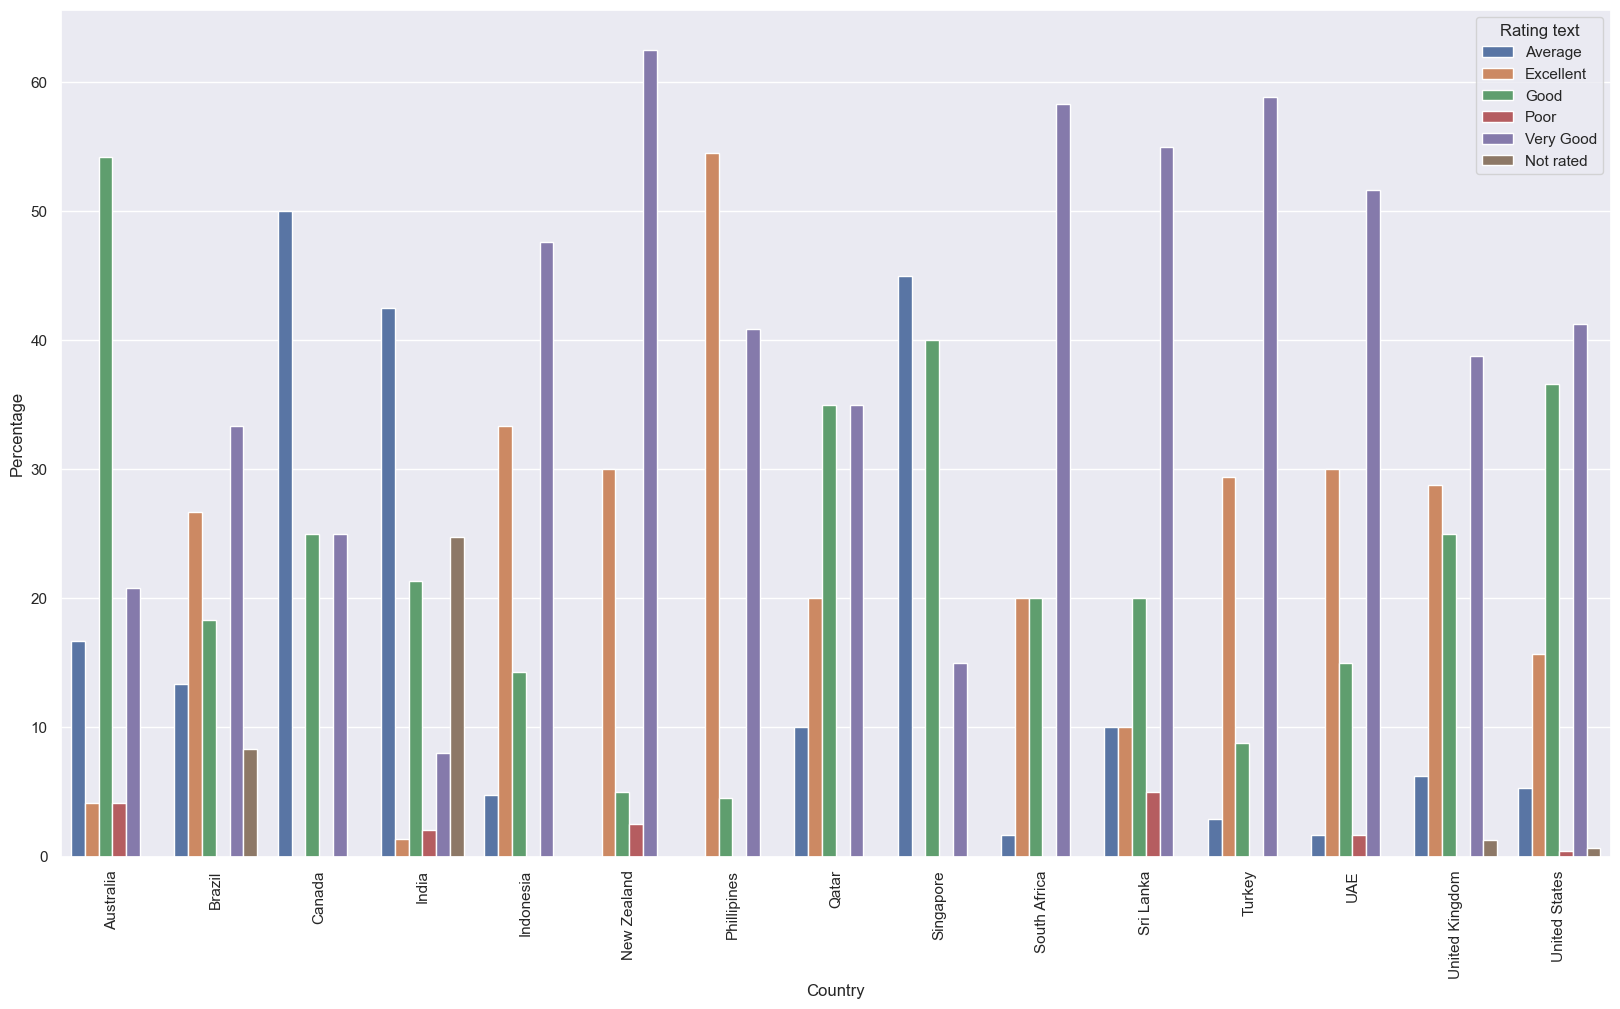

In [58]:
sns.set(rc={'figure.figsize':(20,11)})
sns.barplot(x='Country',y='Percentage', data=FinalRestPerc, hue = 'Rating text')
plt.xticks(rotation = 90)

looks like autralia seems to have good restaurants with delicious food 

# 9) Does rating influence the cost of restaurnats? ( draw boxplot)

In [59]:
avgcostforindres=indiaRes['Average Cost for two']
aggratingofindres=pd.Categorical(values=indiaRes['Rating text'],categories=["Excellent", "Very Good", "Good", "Average", "Poor", "Not rated"], ordered=True)
sns.boxplot(x='aggratingofindres',y='avgcostforindres')

ValueError: Could not interpret input 'aggratingofindres'

# 


# 10)Top Percentage cover of restaurants in a city.(Draw pie graph for this).

<Axes: ylabel='count'>

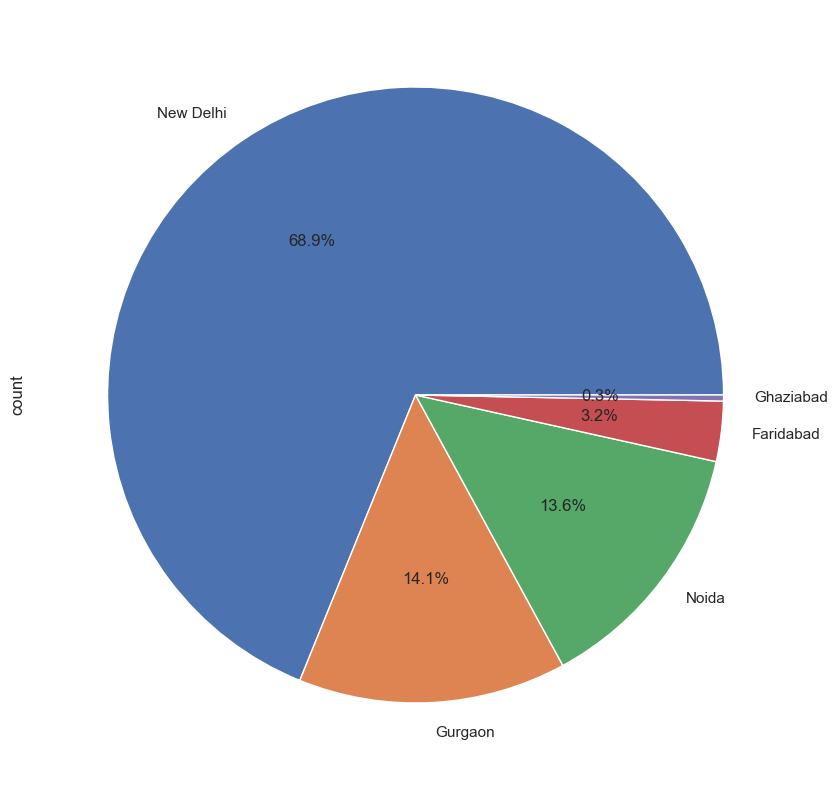

In [55]:
plt.figure(figsize=(10,10))
indiaRes['City'].value_counts().head().plot(kind='pie',autopct='%1.1f%%')

# 11) Top cuisines in India restaurants (pie graph)

In [56]:
booking_avail=indiaRes[(indiaRes['City']=='New Delhi')&(indiaRes['Aggregate rating']>4.5) &(indiaRes['Has Table booking']=='Yes')][['Aggregate rating','Restaurant Name','Votes','Has Table booking']].sort_values(ascending=False,by='Votes')
booking_avail.style.apply(lambda x: ['background: darkorange' if x.name == 'Has Table booking' else 'background: lightsteelblue' for i in x])

,Aggregate rating,Restaurant Name,Votes,Has Table booking
6659,4.600000,The California Boulevard,1691,Yes
3310,4.600000,Spezia Bistro,1071,Yes
3732,4.600000,Tashan,304,Yes
3014,4.700000,Zabardast Indian Kitchen,242,Yes
6655,4.600000,Band Baaja Baaraat,128,Yes


<Axes: ylabel='count'>

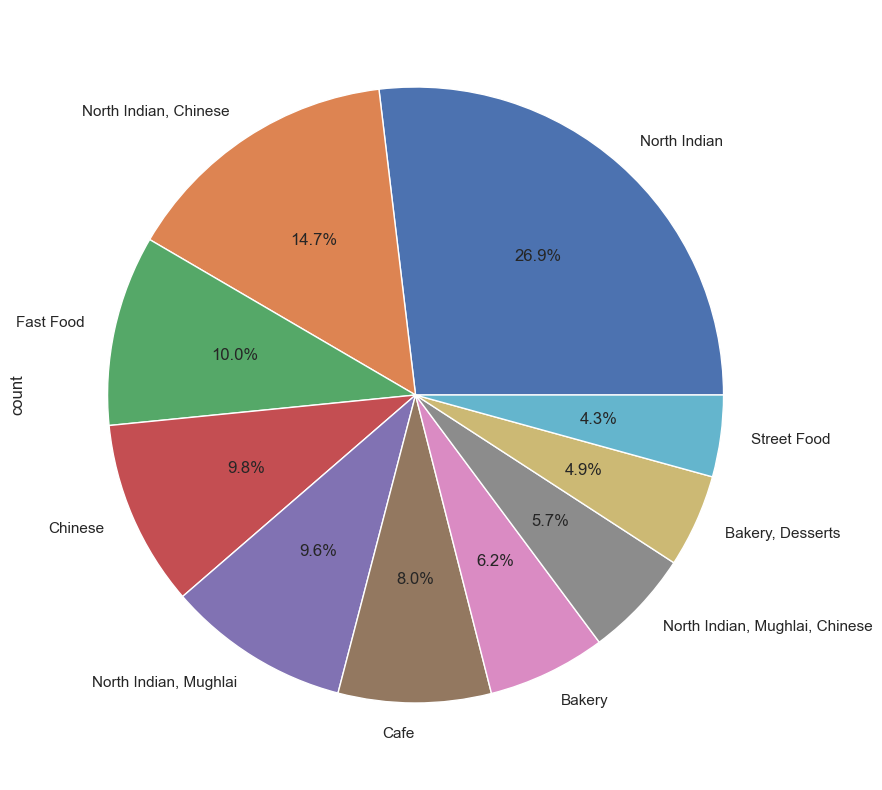

In [57]:
plt.figure(figsize=(10,10))
indiaRes['Cuisines'].value_counts().head(10).plot(kind='pie',autopct='%1.1f%%')